In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import requests

In [64]:
url = 'https://data.cdc.gov/resource/yt7u-eiyg.json'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head(10))
else:
    print(f"Error: {response.status_code}")

   year    age_group birth_rate
0  1940  10-14 Years        0.7
1  1940  15-19 Years       54.1
2  1940  20-24 Years      135.6
3  1940  25-29 Years      122.8
4  1940  30-34 Years       83.4
5  1940  35-39 Years       46.3
6  1940  40-44 Years       15.6
7  1940  45-49 Years        1.9
8  1941  10-14 Years        0.7
9  1941  15-19 Years       56.9


In [65]:
# Convert birthrate to integer and sum each age group

df['birth_rate'] = pd.to_numeric(df['birth_rate'], errors='coerce')
df = df.groupby('year')['birth_rate'].sum().reset_index()
print(df.head(10))

   year  birth_rate
0  1940       460.4
1  1941       479.8
2  1942       525.6
3  1943       543.8
4  1944       513.6
5  1945       498.3
6  1946       588.6
7  1947       654.7
8  1948       621.7
9  1949       622.1


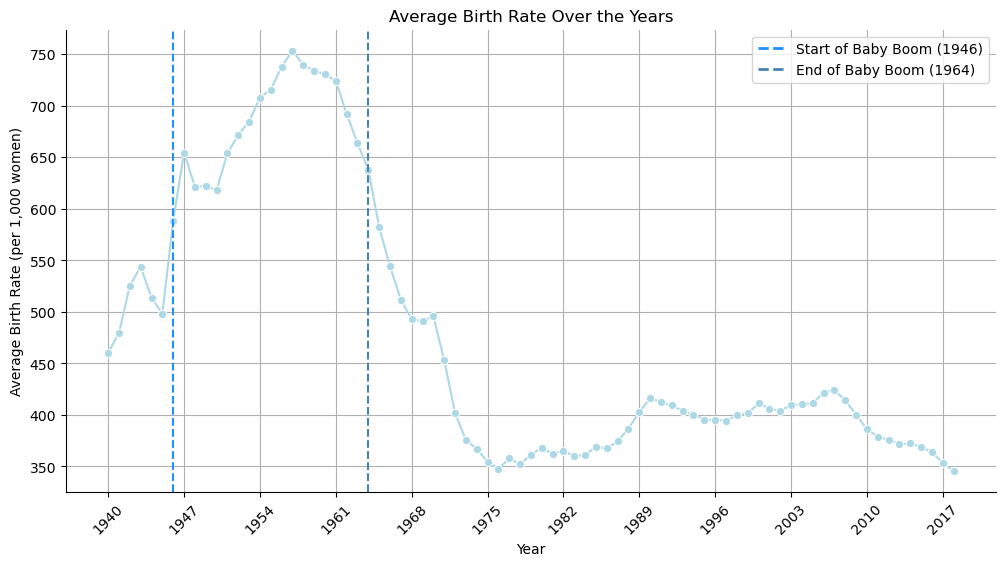

In [114]:
# Set up the graph
plt.figure(figsize=(12, 6))
sns.set_palette("Blues")
sns.lineplot(x='year', y='birth_rate', data=df, color="lightblue" ,marker='o')
plt.axvline(x=6, color = "dodgerblue", linestyle='--', label='Start of Baby Boom (1946)')
plt.axvline(x=24, color="steelblue",linestyle='--', label='End of Baby Boom (1964)')

plt.xticks(ticks=df['year'][::7], rotation=45)

plt.title('Average Birth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Birth Rate (per 1,000 women)')
start_baby_boom = mlines.Line2D([], [], color='dodgerblue', linestyle='--', linewidth=2, label='Start of Baby Boom (1946)')
end_baby_boom = mlines.Line2D([], [], color='steelblue', linestyle='--', linewidth=2, label='End of Baby Boom (1964)')
plt.legend(handles=[start_baby_boom, end_baby_boom], loc='upper right')
plt.grid()
sns.despine(left=False, bottom=False)
plt.show()

In [120]:

trust_df = pd.read_csv('social_security_trust_fund.csv')
trust_df = trust_df.replace(',', '', regex=True)  # Remove commas if any
trust_df = trust_df.astype(float).astype(int)
trust_df['Asset Reserves'] = trust_df['Asset Reserves'] / 1000000
print(trust_df.head(100))

    Calendar Year  Total Income  Total Cost  Net Increase  Asset Reserves
0            1957         12937        7567           523        0.023042
1            1958          9108        8907           201        0.023243
2            1959          9516       10793         -1277        0.021966
3            1960         12445       11798           647        0.022613
4            1961         12937       13388          -451        0.022162
..            ...           ...         ...           ...             ...
62           2019       1061775     1059299          2476        2.897405
63           2020       1118096     1107214         10881        2.908286
64           2021       1088326     1144582        -56256        2.852030
65           2022       1221782     1243925        -22143        2.829887
66           2023       1350686     1392110        -41424        2.788463

[67 rows x 5 columns]


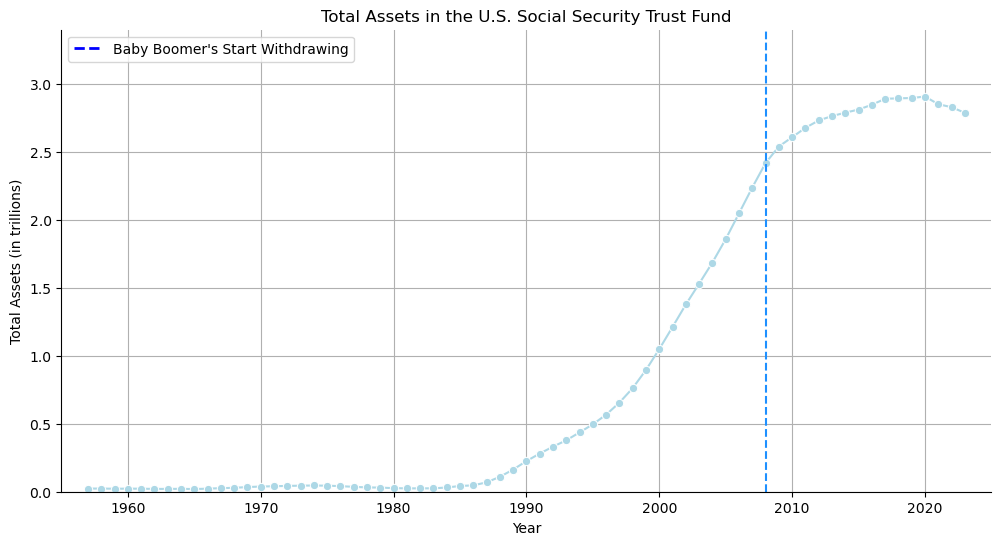

In [122]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Calendar Year', y='Asset Reserves', data=trust_df, color = "lightblue", marker='o')
plt.axvline(x=2008, color = "dodgerblue", linestyle='--')
wiwhdraw_baby_boom = mlines.Line2D([], [], color='blue', linestyle='--', linewidth=2, label='Baby Boomer\'s Start Withdrawing')
plt.legend(handles=[wiwhdraw_baby_boom], loc='upper left')
plt.title('Total Assets in the U.S. Social Security Trust Fund')
plt.xlabel('Year')
plt.ylabel('Total Assets (in trillions)')
plt.grid()
plt.ylim(0, 3.4) 
plt.xlim(1955, 2025) 
sns.despine(left=False, bottom=False)
plt.show()